In [3]:
import torch

In [4]:
torch.__version__

'2.2.2+cpu'

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
x = torch.rand(5, 3).to(device)

In [7]:
x

tensor([[0.0887, 0.3409, 0.5761],
        [0.3829, 0.7372, 0.5452],
        [0.0906, 0.9013, 0.1313],
        [0.8868, 0.2424, 0.1545],
        [0.9850, 0.0042, 0.9579]])

# K-Means

In [8]:
import matplotlib.pyplot as plt

In [9]:
N = 100
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])

In [10]:
X = torch.cat([x1, x2, x3], dim=0)
print(X.shape)

torch.Size([300, 2])


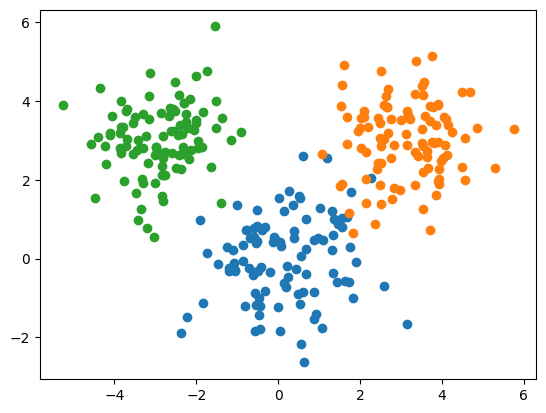

In [11]:
for i in range(3):
    plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
plt.show()

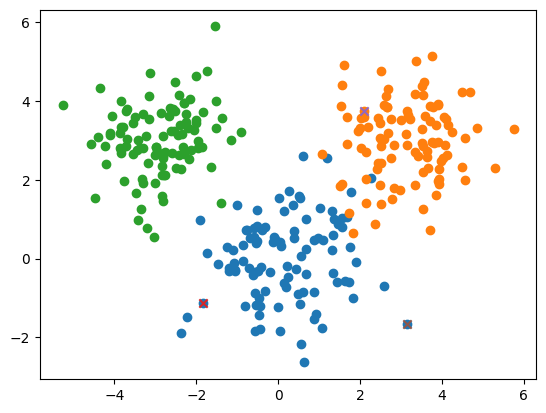

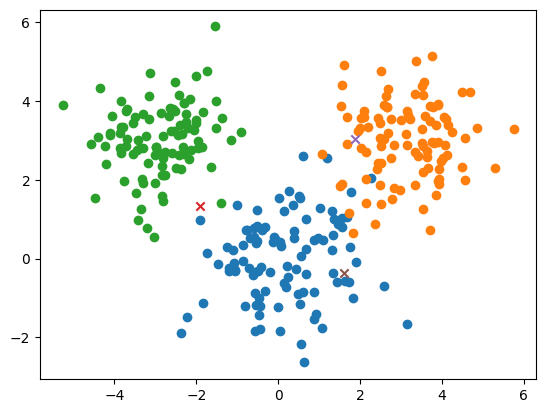

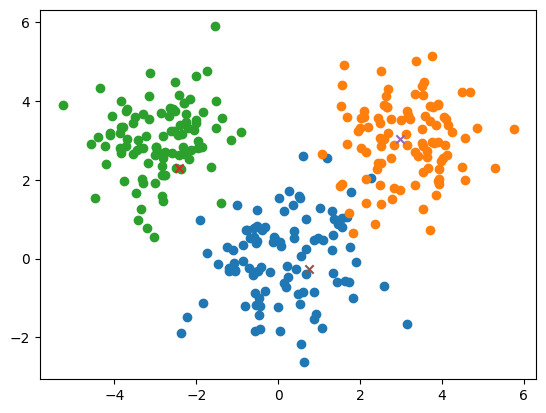

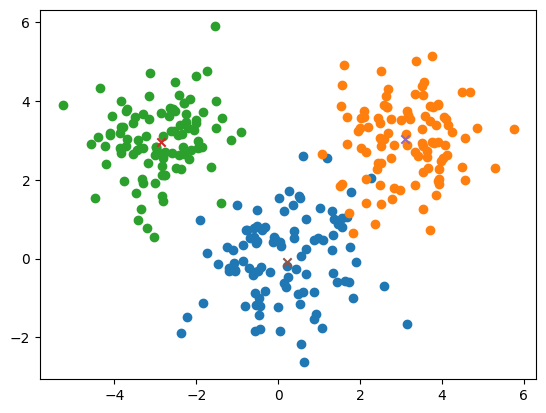

In [12]:
K = 3
centroids = X[torch.randperm(len(X))[:K]]
while True:
    D = torch.cdist(X, centroids)
    clusters = torch.argmin(D, dim=1)
    for i in range(3):
        plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
    old_centroids = centroids.clone()
    for k in range(K):
        plt.scatter(centroids[k, 0], centroids[k, 1], marker='x')
        centroids[k] = X[clusters == k].mean(dim=0)
    change = torch.sum((centroids - old_centroids) ** 2)
    if change < 0.1:
        break
    plt.show()

# MLP

In [13]:
from torch import nn

In [14]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return self.fc3(x)

In [15]:
(1*32+32)+(32*16+16)+(16*1+1)

609

In [16]:
model = Regressor()

In [17]:
N = 1000
x = torch.rand(N, 1).to(device)
y = torch.sin(3 * x + 1) + 0.5 * torch.rand(N, 1).to(device)

In [18]:
device = 'cpu'
model = model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()
for epoch in range(5000):
    y_ = model(x.to(device))
    loss = criterion(y_, y.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.4237614870071411
100: 0.34613505005836487
200: 0.3075176775455475
300: 0.2199164479970932
400: 0.10553714632987976
500: 0.06088397651910782
600: 0.0542549192905426
700: 0.05160503461956978
800: 0.049631986767053604
900: 0.048499807715415955
1000: 0.06527286767959595
1100: 0.04544353485107422
1200: 0.044077519327402115
1300: 0.042974717915058136
1400: 0.04193070903420448
1500: 0.040934789925813675
1600: 0.039980411529541016
1700: 0.03906352445483208
1800: 0.03818174824118614
1900: 0.03733377158641815
2000: 0.036519020795822144
2100: 0.035737380385398865
2200: 0.03498901054263115
2300: 0.034274227917194366
2400: 0.03359339386224747
2500: 0.03294682875275612
2600: 0.03233472257852554
2700: 0.03175714984536171
2800: 0.03121393732726574
2900: 0.030704734846949577
3000: 0.03022894822061062
3100: 0.029785774648189545
3200: 0.029374169185757637
3300: 0.028992909938097
3400: 0.02864059805870056
3500: 0.028315680101513863
3600: 0.028016511350870132
3700: 0.027741340920329094
3800: 0.0274883

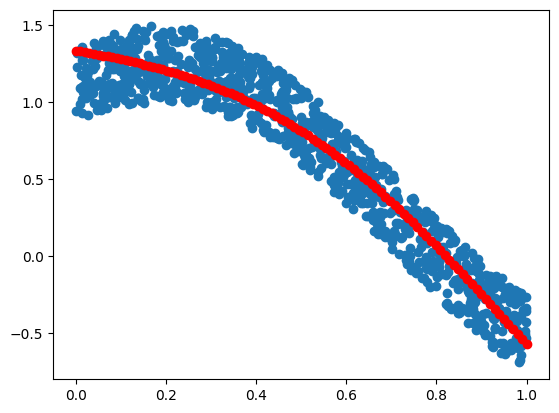

In [19]:
x_ = torch.linspace(0, 1, 100).reshape(-1, 1)
model.eval()
with torch.no_grad():
    y_ = model(x_.to(device))
plt.scatter(x, y)
plt.scatter(x_, y_.cpu(), color='r')
plt.show()

# Classification

In [20]:
N = 100
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])

In [21]:
X = torch.cat([x1, x2, x3], dim=0)

In [22]:
X.shape

torch.Size([300, 2])

In [23]:
Y = torch.cat([torch.zeros(N), torch.ones(N), 2*torch.ones(N)]).long()

In [24]:
Y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [25]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [26]:
model = Classifier()

In [27]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()
for epoch in range(5000):
    y_ = model(X.to(device))
    loss = criterion(y_, Y.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.098122000694275
100: 1.0893081426620483
200: 1.078019380569458
300: 1.059570550918579
400: 1.028926134109497
500: 0.9838330149650574
600: 0.9325773119926453
700: 0.8881998658180237
800: 0.8541628122329712
900: 0.8270779252052307
1000: 0.8033615350723267
1100: 0.7809418439865112
1200: 0.7590871453285217
1300: 0.7379814982414246
1400: 0.7182473540306091
1500: 0.7004976868629456
1600: 0.685064971446991
1700: 0.671962559223175
1800: 0.6609842777252197
1900: 0.6518278121948242
2000: 0.6441805958747864
2100: 0.6377620100975037
2200: 0.6323369741439819
2300: 0.6277154684066772
2400: 0.6237466335296631
2500: 0.6203110814094543
2600: 0.6173141002655029
2700: 0.6146810054779053
2800: 0.6123519539833069
2900: 0.6102786660194397
3000: 0.6084225177764893
3100: 0.6067513823509216
3200: 0.6052393317222595
3300: 0.6038647890090942
3400: 0.6026096343994141
3500: 0.6014589071273804
3600: 0.6003997325897217
3700: 0.5994213819503784
3800: 0.5985147356987
3900: 0.5976719260215759
4000: 0.5968858599662

In [28]:
model.eval()
with torch.no_grad():
    y_ = model(X.to(device))
acc = torch.sum(Y == y_.argmax(dim=1).cpu())/len(Y)
print(acc.item())

0.9733333587646484


# Iris

In [29]:
from sklearn.datasets import load_iris
import numpy as np
df = load_iris(as_frame=True)

In [30]:
itrain = np.r_[0:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]
xtrain = df['data'].iloc[itrain].values
xtest = df['data'].iloc[itest].values
ytrain = df['target'].iloc[itrain].values
ytest = df['target'].iloc[itest].values

In [31]:
xtrain.shape


(75, 4)

In [32]:
len(np.unique(ytrain))

3

In [33]:
# [4] 32 16 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [34]:
xtrain_ = torch.tensor(xtrain, dtype=torch.float32)

In [35]:
xtest_ = torch.tensor(xtest, dtype=torch.float32)


In [36]:
xtrain_

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [37]:
ytrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
ytrain_ = torch.tensor(ytrain, dtype=torch.long)

In [39]:
ytest_ = torch.tensor(ytest, dtype=torch.long)


In [40]:
ytrain_

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2])

In [41]:
model = Classifier()

In [42]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

model.train()
for epoch in range(5000):
    y_ = model(xtrain_.to(device))
    loss = criterion(y_, ytrain_.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.0988259315490723
100: 1.082779049873352
200: 0.9372779130935669
300: 0.8085037469863892
400: 0.7699822187423706
500: 0.7409021854400635
600: 0.7199099063873291
700: 0.7060878276824951
800: 0.6967587471008301
900: 0.6902099251747131
1000: 0.6854379177093506
1100: 0.6818443536758423
1200: 0.6790578961372375
1300: 0.6768403649330139
1400: 0.6750341057777405
1500: 0.6735324859619141
1600: 0.6722620129585266
1700: 0.6711708307266235
1800: 0.670222282409668
1900: 0.6693888306617737
2000: 0.6686503887176514
2100: 0.6679911613464355
2200: 0.6673989295959473
2300: 0.6668636798858643
2400: 0.666377604007721
2500: 0.6659337282180786
2600: 0.6655266880989075
2700: 0.6651517748832703
2800: 0.664804995059967
2900: 0.6644830107688904
3000: 0.6641826629638672
3100: 0.663901686668396
3200: 0.6636376976966858
3300: 0.6633889079093933
3400: 0.6631535291671753
3500: 0.6629301905632019
3600: 0.6627174615859985
3700: 0.6625145077705383
3800: 0.662320077419281
3900: 0.6621332168579102
4000: 0.6619535088

In [43]:
model.eval()
with torch.no_grad():
    y_ = model(xtest_.to(device))
acc = torch.sum(ytest_ == y_.argmax(dim=1).cpu())/len(y_)
print(acc.item())

0.6666666865348816


# Tuning ใหม่

In [44]:
# [4] 128 64 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [45]:
xtrain_ = torch.tensor(xtrain, dtype=torch.float32)

In [46]:
xtest_ = torch.tensor(xtest, dtype=torch.float32)

In [47]:
ytrain_ = torch.tensor(ytrain, dtype=torch.long)

In [48]:
ytest_ = torch.tensor(ytest, dtype=torch.long)

In [49]:
model = Classifier()

In [50]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()
for epoch in range(5000):
    y_ = model(xtrain_.to(device))
    loss = criterion(y_, ytrain_.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.105621099472046
100: 1.1026681661605835
200: 1.1009122133255005
300: 1.0998406410217285
400: 1.0991270542144775
500: 1.0985915660858154
600: 1.0981417894363403
700: 1.0977314710617065
800: 1.0973377227783203
900: 1.0969492197036743
1000: 1.0965596437454224
1100: 1.096165657043457
1200: 1.0957651138305664
1300: 1.0953553915023804
1400: 1.094935655593872
1500: 1.0945041179656982
1600: 1.0940589904785156
1700: 1.0935993194580078
1800: 1.093122959136963
1900: 1.0926287174224854
2000: 1.0921143293380737
2100: 1.091578483581543
2200: 1.091018795967102
2300: 1.0904335975646973
2400: 1.0898206233978271
2500: 1.0891776084899902
2600: 1.088502049446106
2700: 1.0877914428710938
2800: 1.0870431661605835
2900: 1.0862542390823364
3000: 1.0854215621948242
3100: 1.0845417976379395
3200: 1.0836116075515747
3300: 1.0826271772384644
3400: 1.0815842151641846
3500: 1.0804789066314697
3600: 1.0793066024780273
3700: 1.0780622959136963
3800: 1.0767412185668945
3900: 1.0753376483917236
4000: 1.07384550571

In [51]:
model.eval()
with torch.no_grad():
    y_ = model(xtest_.to(device))
acc = torch.sum(ytest_ == y_.argmax(dim=1).cpu())/len(y_)
print(acc.item())

0.6800000071525574


# Tining ใหม่อีกครั้ง

In [52]:
# [4] 128 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 3)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))  #x = torch.sigmoid(self.fc1(x))
        return torch.softmax(self.fc2(x), dim=1) #return torch.sigmoid(self.fc2(x))

In [53]:
xtrain_ = torch.tensor(xtrain, dtype=torch.float32)
xtest_ = torch.tensor(xtest, dtype=torch.float32)
ytrain_ = torch.tensor(ytrain, dtype=torch.long)
ytest_ = torch.tensor(ytest, dtype=torch.long)

In [54]:
model = Classifier()

In [55]:
device = 'cpu' 
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()
for epoch in range(5000):
    y_ = model(xtrain_.to(device))
    loss = criterion(y_, ytrain_.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.1512718200683594
100: 0.8553867340087891
200: 0.7904242873191833
300: 0.7510550022125244
400: 0.7216447591781616
500: 0.6990960240364075
600: 0.6815567016601562
700: 0.6675906777381897
800: 0.6563554406166077
900: 0.6471850872039795
1000: 0.6396172642707825
1100: 0.6332881450653076
1200: 0.6279189586639404
1300: 0.6233111619949341
1400: 0.6193202137947083
1500: 0.6158197522163391
1600: 0.6127273440361023
1700: 0.6099748015403748
1800: 0.6075255274772644
1900: 0.605332612991333
2000: 0.6033517718315125
2100: 0.6015536785125732
2200: 0.5999152064323425
2300: 0.5984162092208862
2400: 0.5970391035079956
2500: 0.5957691073417664
2600: 0.5945937633514404
2700: 0.593503475189209
2800: 0.5924889445304871
2900: 0.5915423631668091
3000: 0.5906567573547363
3100: 0.5898265838623047
3200: 0.5890466570854187
3300: 0.5883128046989441
3400: 0.5876204967498779
3500: 0.5869663953781128
3600: 0.586347222328186
3700: 0.5857604146003723
3800: 0.5852031707763672
3900: 0.5846732258796692
4000: 0.5841686

In [56]:
model.eval()
with torch.no_grad():
    y_ = model(xtest_.to(device))
acc = torch.sum(ytest_ == y_.argmax(dim=1).cpu())/len(y_)
print(acc.item())

0.9466666579246521


In [57]:
y_

tensor([[9.8562e-01, 1.4376e-02, 5.2246e-11],
        [9.9352e-01, 6.4822e-03, 1.7851e-11],
        [9.9731e-01, 2.6936e-03, 9.1868e-13],
        [9.9720e-01, 2.8007e-03, 9.2313e-13],
        [9.9225e-01, 7.7535e-03, 3.6589e-11],
        [9.8949e-01, 1.0508e-02, 5.0380e-11],
        [9.9486e-01, 5.1369e-03, 3.1377e-12],
        [9.9942e-01, 5.7515e-04, 3.1698e-14],
        [9.9959e-01, 4.1370e-04, 8.4183e-15],
        [9.9199e-01, 8.0091e-03, 1.9992e-11],
        [9.9695e-01, 3.0451e-03, 1.7076e-12],
        [9.9820e-01, 1.7985e-03, 1.4276e-13],
        [9.9847e-01, 1.5325e-03, 5.2789e-13],
        [9.9376e-01, 6.2437e-03, 4.7430e-11],
        [9.9652e-01, 3.4819e-03, 2.0607e-12],
        [9.9793e-01, 2.0669e-03, 1.1377e-12],
        [9.4360e-01, 5.6403e-02, 3.9433e-09],
        [9.9617e-01, 3.8286e-03, 1.7362e-11],
        [9.9275e-01, 7.2468e-03, 3.7173e-11],
        [9.9515e-01, 4.8507e-03, 8.5447e-12],
        [9.9026e-01, 9.7420e-03, 4.8685e-11],
        [9.9836e-01, 1.6448e-03, 4

# Export Model

In [58]:
torch.save(model.state_dict(), 'model.pth')

# HW Titanic

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df = df.drop(columns=['class', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

In [8]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who'],
      dtype='object')

In [9]:
import pandas as pd

In [10]:
df = pd.get_dummies(df, dtype=float)

In [11]:
df

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,0,3,NaN,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
df = df.drop(columns=['sex_female'])

In [13]:
df

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,0,3,NaN,1,2,23.4500,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
df.isnull().sum()

survived        0
pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
who_child       0
who_man         0
who_woman       0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_C    0
embarked_Q    0
embarked_S    0
who_child     0
who_man       0
who_woman     0
dtype: int64

In [18]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [19]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0.0,0.0,1.0,0.0,0.0,0.0,1.0
886,2,27.0,0,0,13.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

# แบ่ง Train Test

In [47]:
import torch
from torch import nn

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [50]:
xtrain = torch.tensor(xtrain.values, dtype=torch.float32)
xtest = torch.tensor(xtest.values, dtype=torch.float32)
ytrain = torch.tensor(ytrain.values, dtype=torch.float32)
ytest = torch.tensor(ytest.values, dtype=torch.float32)

In [51]:
ytrain

tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 

In [52]:
ytest

tensor([1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.])

In [53]:
ytrain = ytrain.reshape(-1, 1)
ytrain

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
      

In [54]:
ytest = ytest.reshape(-1, 1)
ytest

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [55]:
xtrain.shape

torch.Size([571, 12])

In [56]:
ytrain.unique()

tensor([0., 1.])

In [57]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(12, 128)
        self.fc2 = nn.Linear(128, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

In [58]:
model = Classifier()

In [59]:
ytrain.shape

torch.Size([571, 1])

In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(5000):
    y_ = model(xtrain.to(device))
    loss = criterion(y_, ytrain.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 4.151676654815674
100: 0.38062751293182373
200: 0.34564706683158875
300: 0.32845813035964966
400: 0.31552407145500183
500: 0.3029019236564636
600: 0.288787305355072
700: 0.2783766984939575
800: 0.2687745988368988
900: 0.25763556361198425
1000: 0.2486334890127182
1100: 0.24031539261341095
1200: 0.23131051659584045
1300: 0.22183428704738617
1400: 0.22348177433013916
1500: 0.21836970746517181
1600: 0.21012531220912933
1700: 0.2053983211517334
1800: 0.20119792222976685
1900: 0.19716504216194153
2000: 0.19338439404964447
2100: 0.18976952135562897
2200: 0.188397616147995
2300: 0.18510891497135162
2400: 0.1817140281200409
2500: 0.17712624371051788
2600: 0.17339999973773956
2700: 0.2642180025577545
2800: 0.18108655512332916
2900: 0.17277096211910248
3000: 0.17026205360889435
3100: 0.16837255656719208
3200: 0.16632813215255737
3300: 0.16426225006580353
3400: 0.16258220374584198
3500: 0.16119445860385895
3600: 0.15923629701137543
3700: 0.16464637219905853
3800: 0.1553226113319397
3900: 0.1529

In [61]:
model.eval()
with torch.no_grad():
    y_ = model(xtest.to(device))
acc = torch.sum(ytest == y_.round().cpu()) / len(y_)
print(acc.item())

0.7132866978645325


In [62]:
torch.save(model.state_dict(), 'model_titanic.pth')

In [63]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.7035,  0.0852,  0.9787,  ..., -0.5017,  0.2576,  0.5006],
                      [-0.6484,  0.1583, -0.3005,  ..., -0.7451, -0.5353,  0.2855],
                      [-0.0825, -0.1934, -3.1594,  ..., -1.8154, -0.1599,  0.7936],
                      ...,
                      [-0.1470,  0.4198,  1.3691,  ..., -0.2413, -1.5622, -1.0851],
                      [-0.6570,  0.1714,  0.1134,  ..., -1.0360, -0.3808,  0.2452],
                      [-0.4319,  0.0435, -0.2790,  ..., -0.3224, -0.4407, -0.4272]],
                     device='cuda:0')),
             ('fc1.bias',
              tensor([ 1.9061e-01, -2.3082e-01, -2.2514e-01,  1.2014e+00,  1.1877e-01,
                      -1.3608e-01, -2.0591e-01,  1.9526e+00,  5.9673e-01,  2.5780e-01,
                       1.4547e+00,  2.7824e-01,  2.6126e-01,  2.6333e-01, -2.1678e+00,
                       7.9517e-01,  2.6475e-01,  9.8950e-01, -8.5446e-01, -2.7119e-01,
                      -5.9

In [64]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'who_child', 'who_man',
       'who_woman'],
      dtype='object')

In [65]:
df.max()

survived        1.0000
pclass          3.0000
age            80.0000
sibsp           5.0000
parch           6.0000
fare          512.3292
sex_male        1.0000
embarked_C      1.0000
embarked_Q      1.0000
embarked_S      1.0000
who_child       1.0000
who_man         1.0000
who_woman       1.0000
dtype: float64

In [66]:
df.mean()

survived       0.406162
pclass         2.236695
age           29.699118
sibsp          0.512605
parch          0.431373
fare          34.694514
sex_male       0.634454
embarked_C     0.182073
embarked_Q     0.039216
embarked_S     0.775910
who_child      0.116246
who_man        0.578431
who_woman      0.305322
dtype: float64